Learning notes from https://realpython.com/pandas-python-explore-dataset/

key points:

- describe dataframe with `.describe()` and `.info()`
- access elements in a series or dataframe
- dataframe `.groupby()`, query, concatenation and plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and describe

In [3]:
# read csv from URL
nba = pd.read_csv(
    "https://datahub.io/five-thirty-eight/nba-elo/r/nbaallelo.csv",
    error_bad_lines=False,
)


In [4]:
# describe non-numeric columns
nba.describe(include=np.object)


,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,201501140tor,nba,4/16/2014,bos,lakers,bos,lakers,a,l,at new york ny
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [5]:
# describe numeric columns
nba.describe()


,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [6]:
# subset a dataframe
nba.loc[nba["fran_id"] == "lakers", "team_id"].value_counts()


lal    5078
mnl     946
Name: team_id, dtype: int64

In [7]:
# subset a dataframe
nba.loc[nba["team_id"] == "mnl", "date_game"].agg(("min", "max"))


min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

## Series and DataFrame

In [9]:
# create a series
city_revenues = pd.Series(
    [5555, 7000, 1980],
    index=["Amsterdam", "Toronto", "Tokyo"],
)


In [10]:
# numpy array backend with an additional index
print(type(city_revenues.values))
print(city_revenues.index)

<class 'numpy.ndarray'>
Index(['Amsterdam', 'Toronto', 'Tokyo'], dtype='object')


In [11]:
# dict behavior
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count.keys()


Index(['Amsterdam', 'Tokyo'], dtype='object')

In [12]:
# dict behavior
"Tokyo" in city_employee_count


True

In [13]:
# the DataFrame is aligned by index
city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count,
})
city_data


,revenue,employee_count
Amsterdam,5555,5.0
Tokyo,1980,8.0
Toronto,7000,NaN


In [14]:
# numpy array backend with row & column indices
print(city_data.values)
print(city_data.axes)


[[5.555e+03 5.000e+00]
 [1.980e+03 8.000e+00]
 [7.000e+03       nan]]
[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'), Index(['revenue', 'employee_count'], dtype='object')]


In [15]:
# dict behavior. keys = columns
city_data.keys()


Index(['revenue', 'employee_count'], dtype='object')

## Access elements

In [16]:
# access elements in a series by label index
city_revenues["Toronto"]


7000

In [17]:
# access elements in a series by label index
city_revenues.loc["Toronto"]


7000

In [18]:
# access elements in a series by positional index
city_revenues[1]


7000

In [19]:
# access elements in a series by positional index
city_revenues.iloc[1]


7000

In [20]:
# access columns in a dataframe
city_data["revenue"]


Amsterdam    5555
Tokyo        1980
Toronto      7000
Name: revenue, dtype: int64

In [21]:
# access columns in a dataframe
# NOTE: not recommended since there might be naming conflict
city_data.revenue


Amsterdam    5555
Tokyo        1980
Toronto      7000
Name: revenue, dtype: int64

In [22]:
# access rows in a dataframe
city_data.loc["Amsterdam"]


revenue           5555.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [23]:
# access rows in a dataframe
city_data.iloc[1]


revenue           1980.0
employee_count       8.0
Name: Tokyo, dtype: float64

In [24]:
# access elements in a dataframe by label index
city_data.loc["Amsterdam":"Tokyo", "revenue"]


Amsterdam    5555
Tokyo        1980
Name: revenue, dtype: int64

In [25]:
# access elements in a dataframe by positional index
city_data.iloc[0:2, 0]


Amsterdam    5555
Tokyo        1980
Name: revenue, dtype: int64

## Query a dataframe

An alternative is to run SQL on dataframe with [pandasql](https://github.com/yhat/pandasql).

In [26]:
# query a dataframe
nba[
    (nba["_iscopy"] == 0) &
    (nba["team_id"].str.startswith("la")) &
    (nba["year_id"] == 1992) &
    (nba["notes"].notnull())
].head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030lac,nba,0,1992,5/3/1992,86,1,lac,clippers,115,1546.90,1556.0,47.89,uta,jazz,107,1647.51,1638.41,h,w,0.50,"at anaheim,..."
68903,34452,199205030lal,nba,0,1992,5/3/1992,86,1,lal,lakers,76,1489.65,1474.4,39.40,por,trailblazers,102,1655.12,1670.37,h,l,0.41,at las vega...


## groupby

In [27]:
nba.groupby(
    ["year_id", "game_result"],
    sort=False
)["pts"].count()


year_id  game_result
1947     l               350
         w               350
1948     w               215
         l               215
1949     l               380
         w               380
1950     w               593
         l               593
1951     l               380
         w               380
                        ... 
2011     l              1311
         w              1311
2012     w              1074
         l              1074
2013     l              1314
         w              1314
2014     l              1319
         w              1319
2015     w              1311
         l              1311
Name: pts, Length: 138, dtype: int64

## Manipulating columns

In [28]:
# copy a dataframe
import copy
df = copy.deepcopy(nba)


In [29]:
# add a column
df["difference"] = df.pts - df.opp_pts


In [30]:
# rename columns
renamed_df = df.rename(
    columns={
        "game_result": "result",
        "game_location": "location",
    }
)
renamed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
gameorder      126314 non-null int64
game_id        126314 non-null object
lg_id          126314 non-null object
_iscopy        126314 non-null int64
year_id        126314 non-null int64
date_game      126314 non-null object
seasongame     126314 non-null int64
is_playoffs    126314 non-null int64
team_id        126314 non-null object
fran_id        126314 non-null object
pts            126314 non-null int64
elo_i          126314 non-null float64
elo_n          126314 non-null float64
win_equiv      126314 non-null float64
opp_id         126314 non-null object
opp_fran       126314 non-null object
opp_pts        126314 non-null int64
opp_elo_i      126314 non-null float64
opp_elo_n      126314 non-null float64
location       126314 non-null object
result         126314 non-null object
forecast       126314 non-null float64
notes          5424 non-null object
difference     126

In [31]:
# drop columns
elo_columns = [_ for _ in df.columns if "elo" in _]
df.drop(elo_columns, inplace=True, axis=1)


In [32]:
# specify data types
df["date_game"] = pd.to_datetime(df["date_game"])
df["game_location"] = pd.Categorical(df["game_location"]) # memory efficient
df["game_location"].dtype


CategoricalDtype(categories=['a', 'h', 'n'], ordered=False)

In [33]:
# drop rows with missing values
rows_without_missing_data = df.dropna()
rows_without_missing_data.shape


(5424, 20)

In [34]:
# drop columns with missing values
columns_without_missing_data = df.dropna(axis=1)
columns_without_missing_data.shape


(126314, 19)

In [35]:
# fill na
data_with_default_notes = df.copy()
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True,
)
data_with_default_notes["notes"].describe()


count             126314
unique               232
top       no notes at...
freq              120890
Name: notes, dtype: object

## Combine DataFrames

In [36]:
# concat rows
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count":[2, 2]},
    index=["New York", "Barcelona"],
)
all_city_data = pd.concat(
    [city_data, further_city_data],
    sort=False,
    axis=0,
)
all_city_data

,revenue,employee_count
Amsterdam,5555,5.0
Tokyo,1980,8.0
Toronto,7000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [37]:
# concat columns
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
cities = pd.concat(
    [all_city_data, city_countries],
    axis=1,
    sort=False,
)
cities


,revenue,employee_count,country,capital
Amsterdam,5555.0,5.0,Holland,1.0
Tokyo,1980.0,8.0,Japan,1.0
Toronto,7000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [38]:
# join dataframes
countries = pd.DataFrame({
    "population_millions": [17, 127, 37],
    "continent": ["Europe", "Asia", "North America"]
    }, 
    index= ["Holland", "Japan", "Canada"],
)
pd.merge(
    cities, 
    countries, 
    left_on="country", 
    right_index=True,
    how="left",
)


,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,5555.0,5.0,Holland,1.0,17.0,Europe
Tokyo,1980.0,8.0,Japan,1.0,127.0,Asia
Toronto,7000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


## Plotting

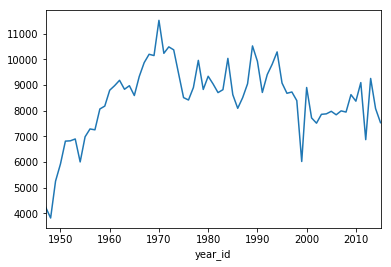

In [39]:
# line chart
nba[nba["fran_id"] == "knicks"].groupby("year_id")["pts"].sum().plot()


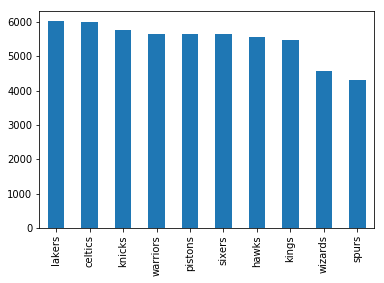

In [40]:
# bar chart
nba["fran_id"].value_counts().head(10).plot(kind="bar")
